Partie 1 - Application de modèles de régression sur le dataset California Housing (sans réduction)

In [1]:
#Ici, on importe les librairies nécessaires au fonctionnement du notebook
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt


In [2]:
# On load le dataset séléctionné (toujours fournit par la librairie scikit-learn, ici le dataset California Housing avec des données concernant le prix de maisons en vente en fonction de plusieurs paramètres)
print("Chargement du dataset...")
california = fetch_california_housing()
print(california.data.shape)


Chargement du dataset...
(20640, 8)


In [3]:
# On configure nos variables X et Y correspondants aux features (caractèristiques) et target (étiquettes) du dataset
print("Preparing features and target variable...")
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

Preparing features and target variable...


In [4]:
#ici on split le dataset en plusieurs matrices qui correspondront à nos sets d'entrainement et de test (avec un ratio de 20% - 80%)
print("Splitting dataset into train and test...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splitting dataset into train and test...


In [5]:
#ici on définit nos modèles de régression, en ajoutant en plus le modèle Gradient Boosting Regressor + modification des hyperparamètres
print("Initializing models...")
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, solver='svd'),
    'Lasso Regression': Lasso(alpha=0.1, selection='random'),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
}

Initializing models...


Training and evaluating models...
Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Random Forest Regressor...
Training Gradient Boosting Regressor...

Model Performance:
                         Model       MSE       MAE  R2 Score
0            Linear Regression  0.555892  0.533200  0.575788
1             Ridge Regression  0.555803  0.533204  0.575855
2             Lasso Regression  0.612990  0.581291  0.532214
3      Random Forest Regressor  0.255368  0.327543  0.805123
4  Gradient Boosting Regressor  0.293997  0.371643  0.775645
Plotting performance metrics...


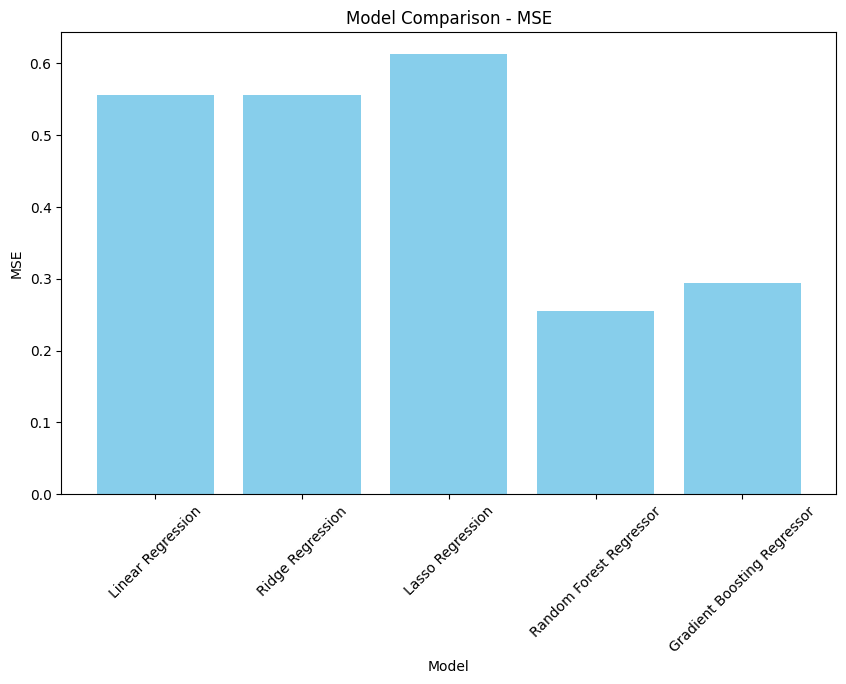

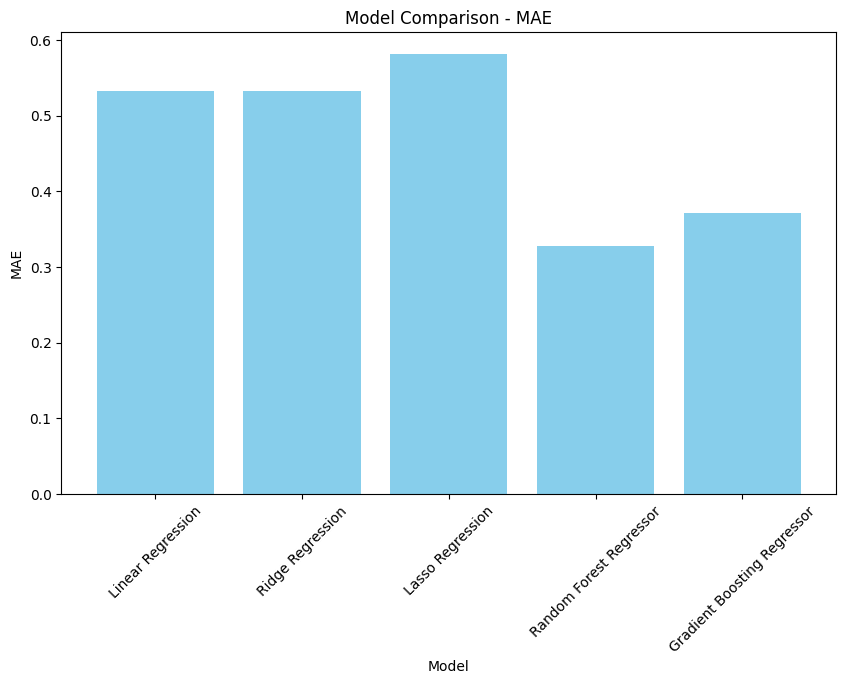

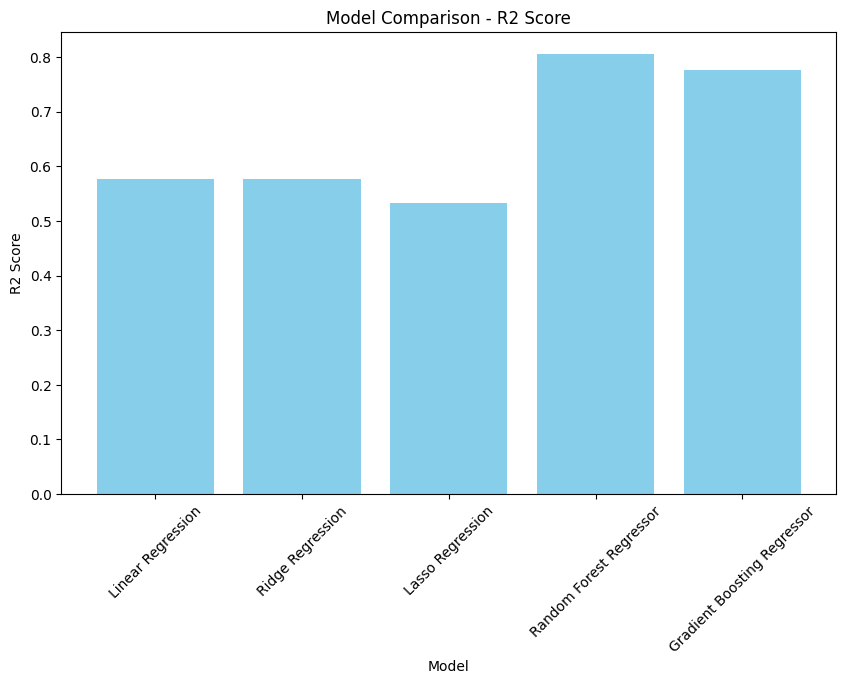

In [6]:
#Ici on entraine nos modèles et on calcule des métriques afin de l'évaluer (mean squared error, mean absolute error et le r2 score) que l'on affiche sous forme de graphiques
results = []
model_predictions = {}

print("Training and evaluating models...")
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    model_predictions[model_name] = predictions

    # Calculate performance metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store results
    results.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2
    })

results_df = pd.DataFrame(results)
print("\nModel Performance:")
print(results_df)

print("Plotting performance metrics...")
metrics = ['MSE', 'MAE', 'R2 Score']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Model'], results_df[metric], color='skyblue')
    plt.title(f'Model Comparison - {metric}')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()

Plotting Predicted vs Actual values for all models...


<ipython-input-7-0a0d0e2f17be>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')


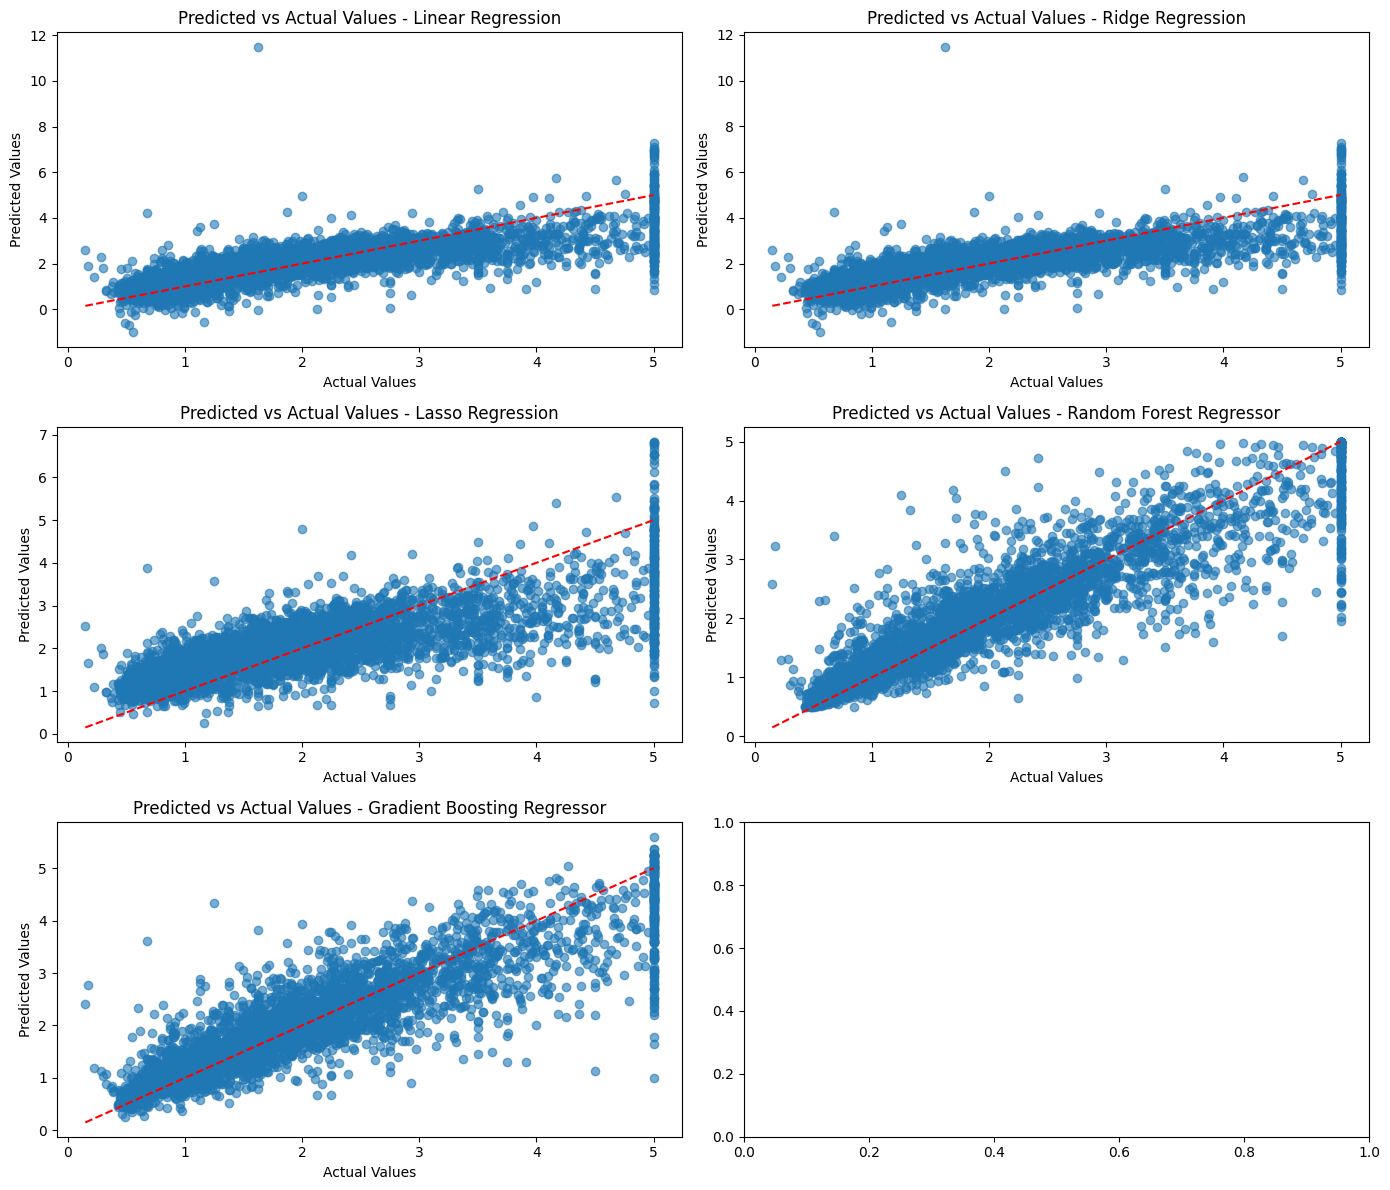

In [7]:
# Ici, c'est un autre bloc de visualisation qui permet de voir les résultats prédits et attendus et leur répartition autours de la ligne de régression
print("Plotting Predicted vs Actual values for all models...")
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()
for idx, (model_name, predictions) in enumerate(model_predictions.items()):
    axes[idx].scatter(y_test, predictions, alpha=0.6)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')
    axes[idx].set_title(f'Predicted vs Actual Values - {model_name}')
    axes[idx].set_xlabel('Actual Values')
    axes[idx].set_ylabel('Predicted Values')
plt.tight_layout()
plt.show()

Plotting Residuals for all models...


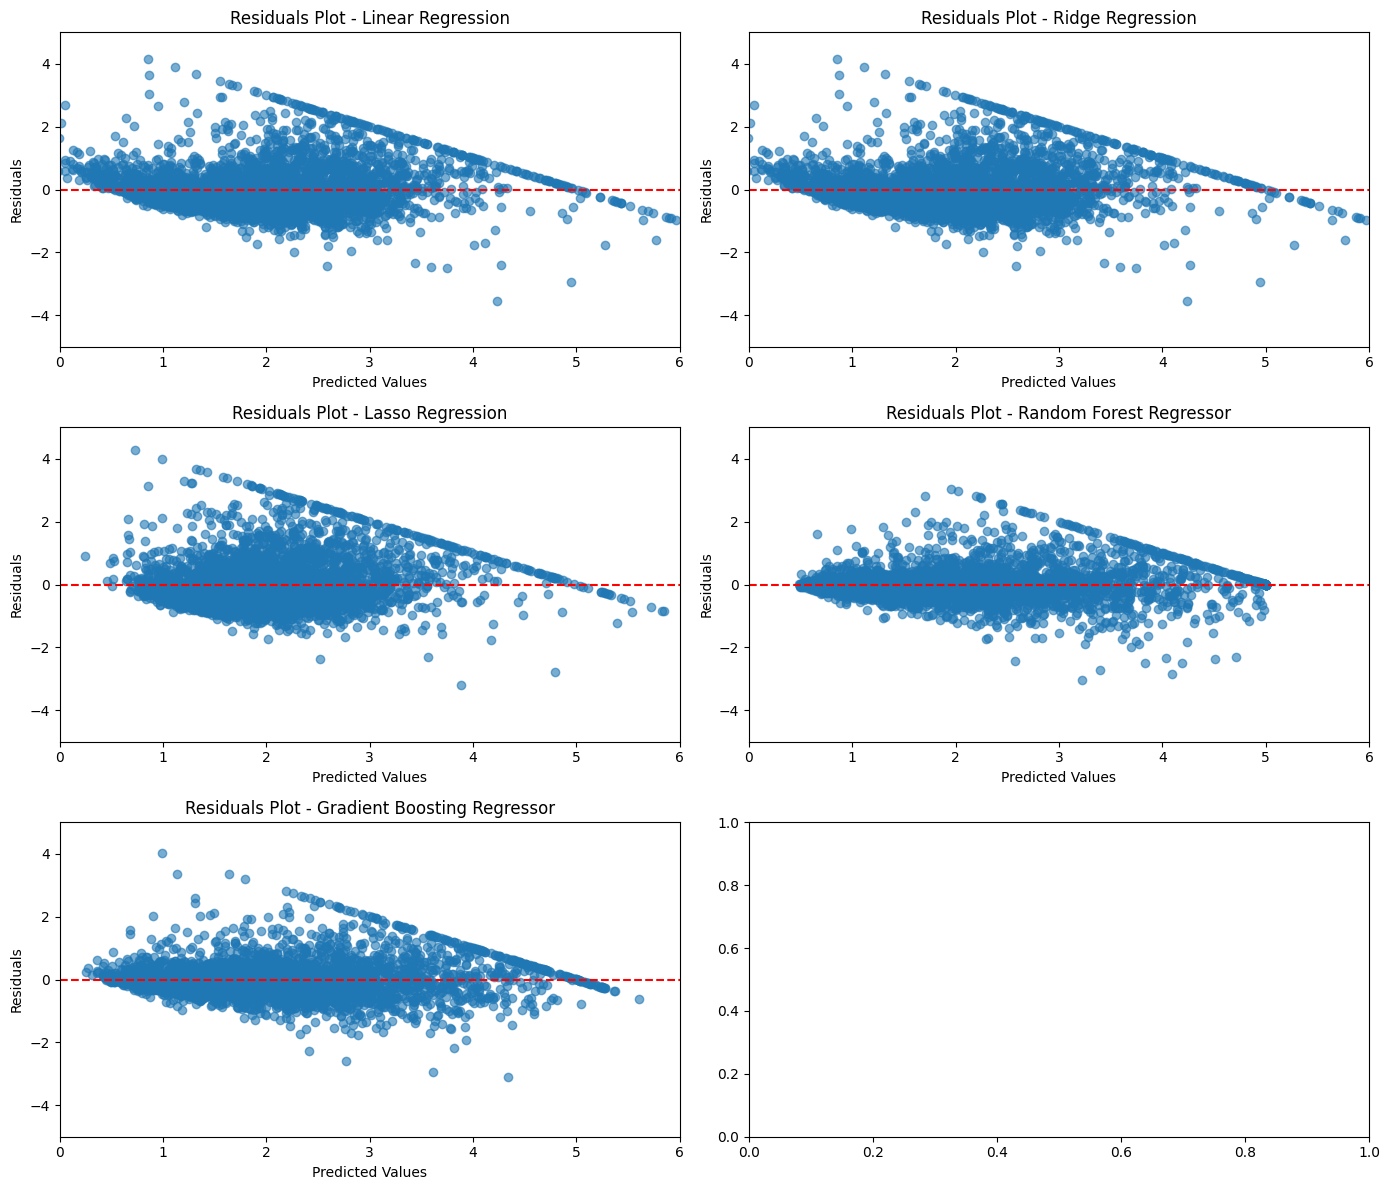

In [8]:
# Enfin, on fait un affichage du résidus
print("Plotting Residuals for all models...")
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()
for idx, (model_name, predictions) in enumerate(model_predictions.items()):
    residuals = y_test - predictions
    axes[idx].scatter(predictions, residuals, alpha=0.6)
    axes[idx].axhline(y=0, color='red', linestyle='--')
    axes[idx].set_xlim(0, 6)
    axes[idx].set_ylim(-5, 5)
    axes[idx].set_title(f'Residuals Plot - {model_name}')
    axes[idx].set_xlabel('Predicted Values')
    axes[idx].set_ylabel('Residuals')
plt.tight_layout()
plt.show()

# Exercise: Modify this notebook to:
# 1. Include additional models like Gradient Boosting or SVR.
# 2. Test the effect of hyperparameter tuning for each model.
# 3. Experiment with different subsets of features using feature selection.


Partie 2 - Mêmes traitements mais avec changement des hyperparamètres puis réduction SVD pour voir si la réduction de dimensionnalité de notre matrice a un impact et améliore notre regression










In [23]:
# On load le dataset séléctionné (toujours fournit par la librairie scikit-learn, ici le dataset California Housing avec des données concernant le prix de maisons en vente en fonction de plusieurs paramètres)
print("Chargement du dataset...")
hyper_california = fetch_california_housing()
print(hyper_california.data.shape)


Chargement du dataset...
(20640, 8)


In [24]:
# On configure nos variables X et Y correspondants aux features (caractèristiques) et target (étiquettes) du dataset
print("Preparing features and target variable...")
X_hyper = pd.DataFrame(hyper_california.data, columns=hyper_california.feature_names)
y_hyper = hyper_california.target

Preparing features and target variable...


In [25]:
#ici on split le dataset en plusieurs matrices qui correspondront à nos sets d'entrainement et de test (avec un ratio de 20% - 80%)
print("Splitting dataset into train and test...")
X_hyper_train, X_hyper_test, y_hyper_train, y_hyper_test = train_test_split(X_hyper, y_hyper, test_size=0.2, random_state=42)

Splitting dataset into train and test...


In [28]:
#ici on définit nos modèles de régression en modification des hyperparamètres
print("Initializing models...")
models_hyper = {
    'Linear Regression': LinearRegression(positive=True),
    'Ridge Regression': Ridge(alpha=1.0, solver='svd'),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42, loss='absolute_error'),
}

Initializing models...


Training and evaluating models...
Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Random Forest Regressor...
Training Gradient Boosting Regressor...

Model Performance:
                         Model       MSE       MAE  R2 Score
0            Linear Regression  0.662396  0.604625  0.494512
1             Ridge Regression  0.555803  0.533204  0.575855
2             Lasso Regression  0.613512  0.581607  0.531817
3      Random Forest Regressor  0.255368  0.327543  0.805123
4  Gradient Boosting Regressor  0.344685  0.385128  0.736964
Plotting performance metrics...


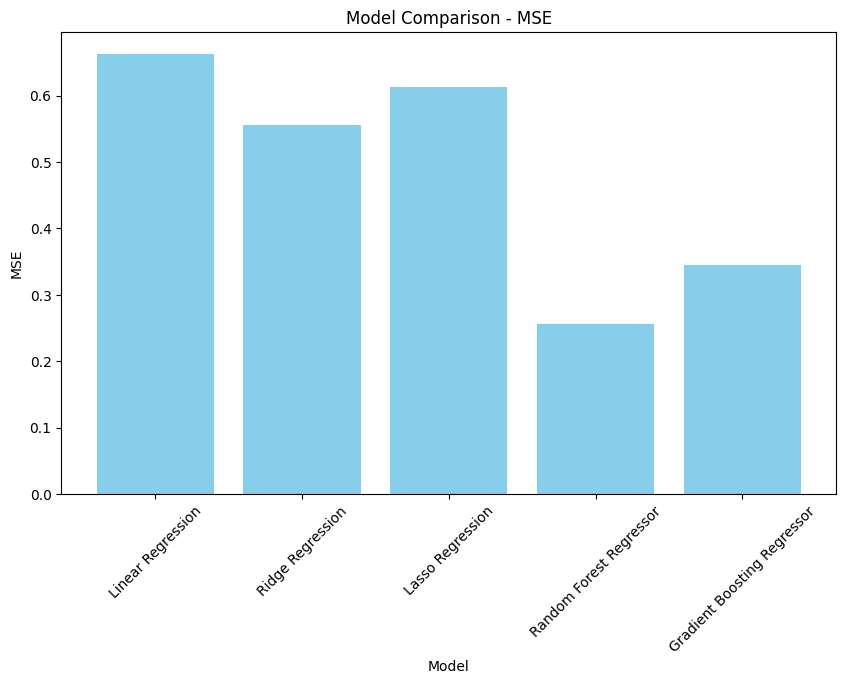

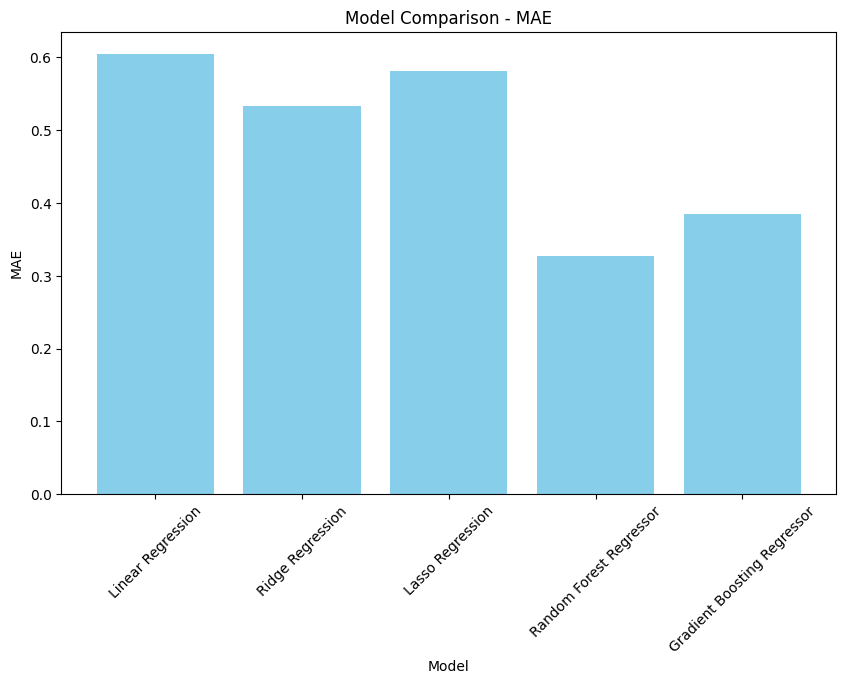

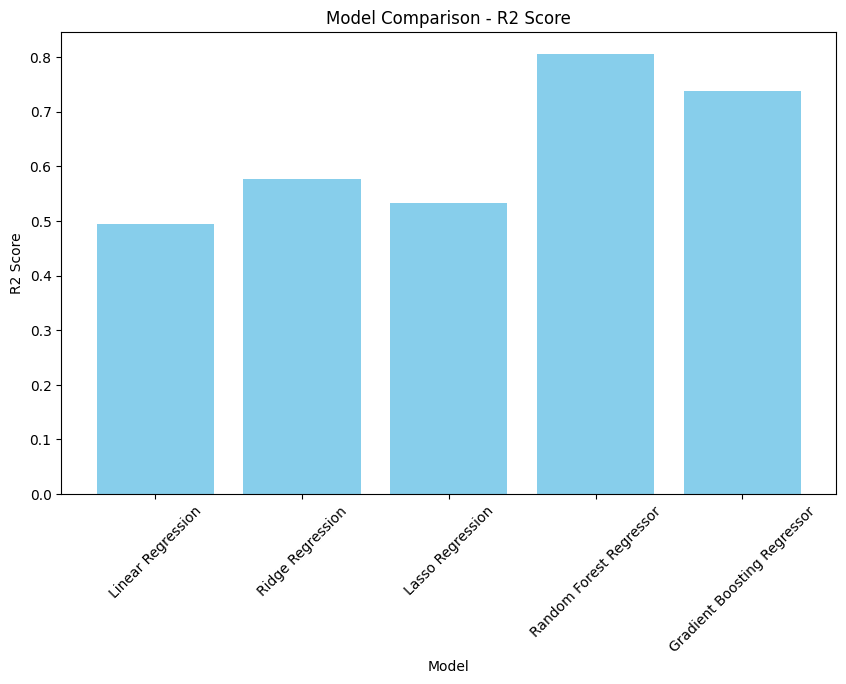

In [30]:
#Ici on entraine nos modèles et on calcule des métriques afin de l'évaluer (mean squared error, mean absolute error et le r2 score) que l'on affiche sous forme de graphiques
results_hyper = []
model_hyper_predictions = {}

print("Training and evaluating models...")
for model_name, model in models_hyper.items():
    print(f"Training {model_name}...")
    model.fit(X_hyper_train, y_hyper_train)
    predictions = model.predict(X_test)
    model_hyper_predictions[model_name] = predictions

    # Calculate performance metrics
    mse = mean_squared_error(y_hyper_test, predictions)
    mae = mean_absolute_error(y_hyper_test, predictions)
    r2 = r2_score(y_hyper_test, predictions)

    # Store results
    results_hyper.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2
    })

results_hyper_df = pd.DataFrame(results_hyper)
print("\nModel Performance:")
print(results_hyper_df)

print("Plotting performance metrics...")
metrics = ['MSE', 'MAE', 'R2 Score']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(results_hyper_df['Model'], results_hyper_df[metric], color='skyblue')
    plt.title(f'Model Comparison - {metric}')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()

Plotting Predicted vs Actual values for all models...


<ipython-input-35-cc38e3ea161c>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[idx].plot([y_hyper_test.min(), y_hyper_test.max()], [y_hyper_test.min(), y_hyper_test.max()], 'k--', color='red')


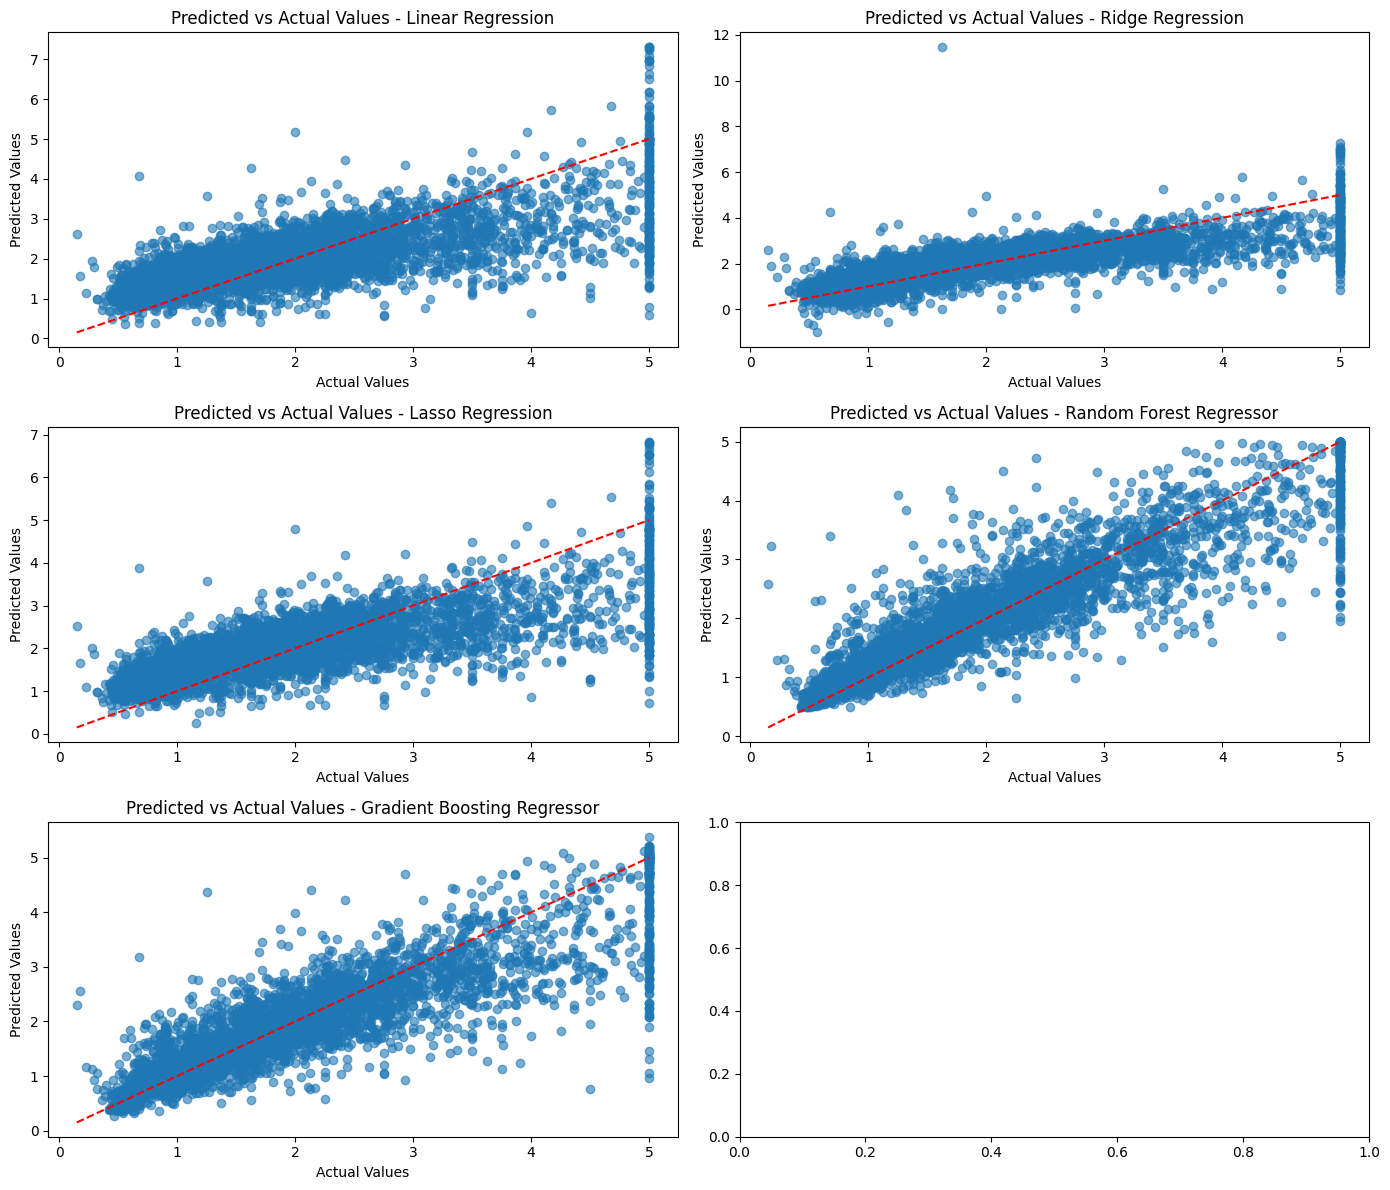

In [35]:
# Ici, c'est un autre bloc de visualisation qui permet de voir les résultats prédits et attendus et leur répartition autours de la ligne de régression
print("Plotting Predicted vs Actual values for all models...")
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()
for idx, (model_name, predictions) in enumerate(model_hyper_predictions.items()):
    axes[idx].scatter(y_hyper_test, predictions, alpha=0.6)
    axes[idx].plot([y_hyper_test.min(), y_hyper_test.max()], [y_hyper_test.min(), y_hyper_test.max()], 'k--', color='red')
    axes[idx].set_title(f'Predicted vs Actual Values - {model_name}')
    axes[idx].set_xlabel('Actual Values')
    axes[idx].set_ylabel('Predicted Values')
plt.tight_layout()
plt.show()

Plotting Residuals for all models...


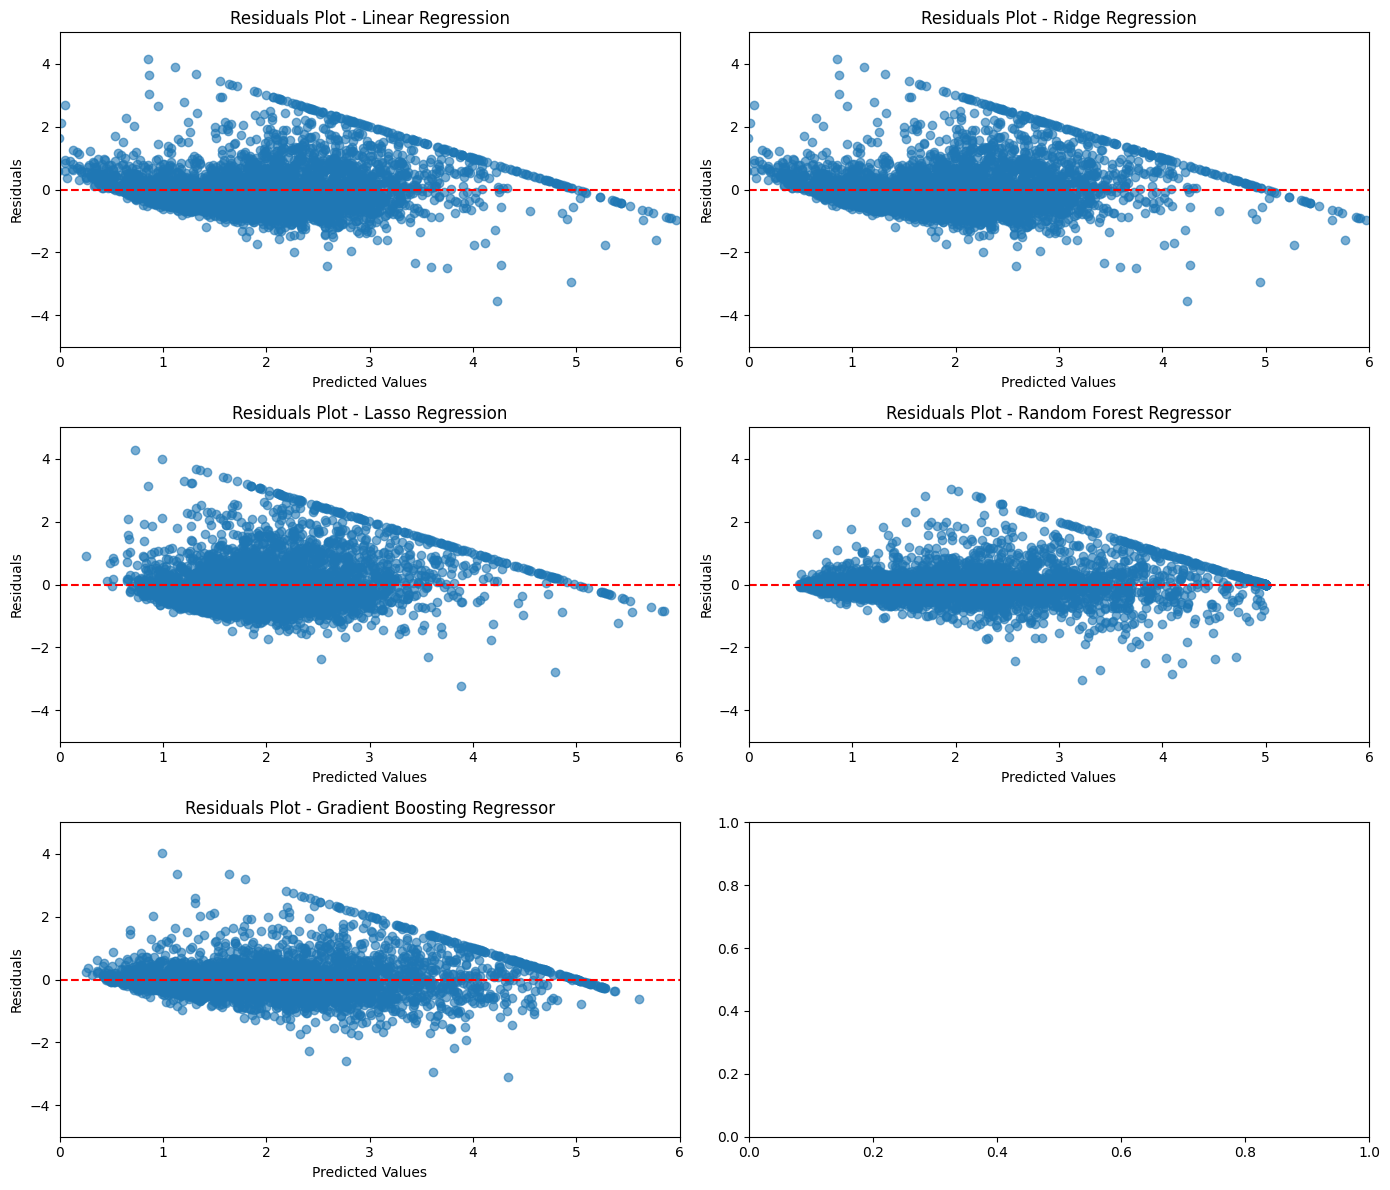

In [16]:
# Enfin, on fait un affichage du résidus
print("Plotting Residuals for all models...")
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()
for idx, (model_name, predictions) in enumerate(model_hyper_predictions.items()):
    residuals = y_hyper_test - predictions
    axes[idx].scatter(predictions, residuals, alpha=0.6)
    axes[idx].axhline(y=0, color='red', linestyle='--')
    axes[idx].set_xlim(0, 6)
    axes[idx].set_ylim(-5, 5)
    axes[idx].set_title(f'Residuals Plot - {model_name}')
    axes[idx].set_xlabel('Predicted Values')
    axes[idx].set_ylabel('Residuals')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.decomposition import TruncatedSVD

# Initialize Truncated SVD with desired number of components (e.g. , 500)
n_components = 4
svd_model = TruncatedSVD(n_components, random_state=42)

# Fit and transform the document - term matrix with Truncated SVD
reduced_california = svd_model.fit_transform(hyper_california.data)

print("Shape of reduced_california :", reduced_california.shape ) # Should show (1778 , 500)
print(reduced_california)

Shape of reduced_california : (20640, 4)
[[ 3.28861100e+02 -1.16812899e+02  6.75475133e+00 -7.95397585e-01]
 [ 2.40451040e+03  2.22797333e+00 -5.49035502e+00 -9.05087940e-01]
 [ 5.02722702e+02 -1.10208820e+02  1.78299150e+01 -2.13899263e+00]
 ...
 [ 1.01252203e+03 -7.22656773e+01 -1.35415950e+01  1.24543660e+00]
 [ 7.46938494e+02 -8.71799526e+01 -1.35276730e+01  1.20425941e+00]
 [ 1.39194140e+03 -5.12436395e+01 -1.32258532e+01  1.26252185e+00]]


In [18]:
print("Preparing features and target variable...")
# Use reduced_california directly, it already contains the transformed data
X_reduced = pd.DataFrame(reduced_california)
# Use original target variable 'y'
y = california.target
print(X_reduced.columns)


Preparing features and target variable...
RangeIndex(start=0, stop=4, step=1)


In [19]:
# Step 2: Train-test split
print("Splitting dataset into train and test...")
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

Splitting dataset into train and test...


In [33]:
# on réentraine et réevalue les modèles avec les nouveaux paramètres
results_reduced = []
model_prediction_reduced = {}

print("Training and evaluating models...")
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_reduced_train, y_train)
    predictions = model.predict(X_reduced_test)
    model_prediction_reduced[model_name] = predictions

    # Calculate performance metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store results
    results_reduced.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2
    })

results_reduces_df = pd.DataFrame(results_reduced)
print("\nModel Performance:")
print(results_reduces_df)


Training and evaluating models...
Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Random Forest Regressor...
Training Gradient Boosting Regressor...

Model Performance:
                         Model       MSE       MAE  R2 Score
0            Linear Regression  1.293401  0.898471  0.012979
1             Ridge Regression  1.293401  0.898471  0.012979
2             Lasso Regression  1.294546  0.900179  0.012106
3      Random Forest Regressor  1.215758  0.856727  0.072230
4  Gradient Boosting Regressor  1.163658  0.834234  0.111989


Plotting performance metrics...


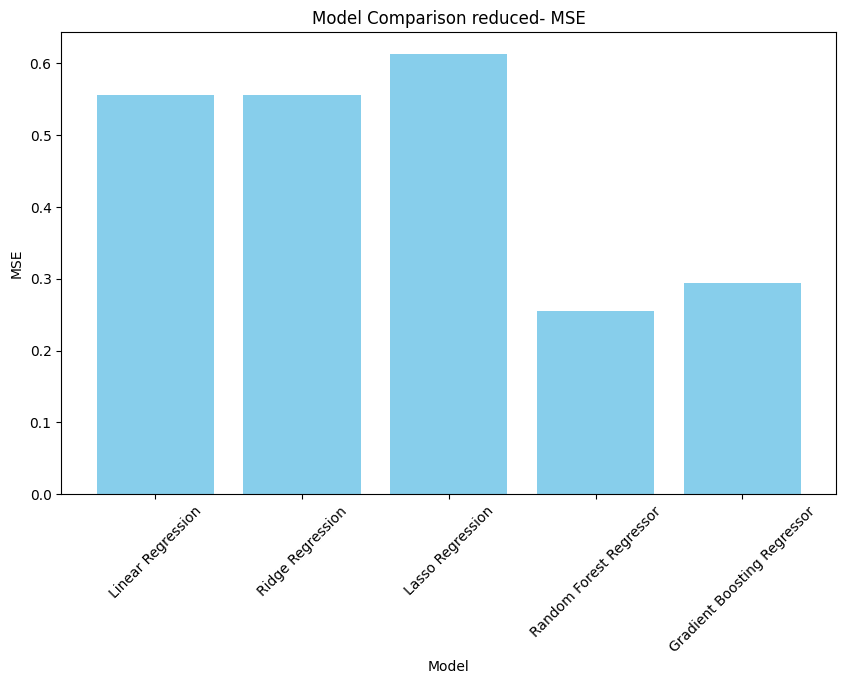

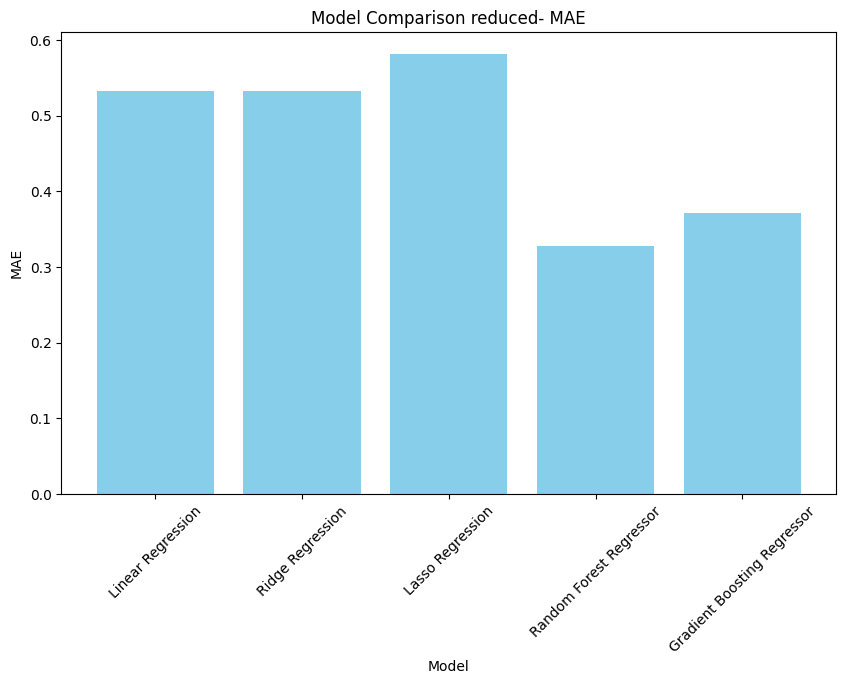

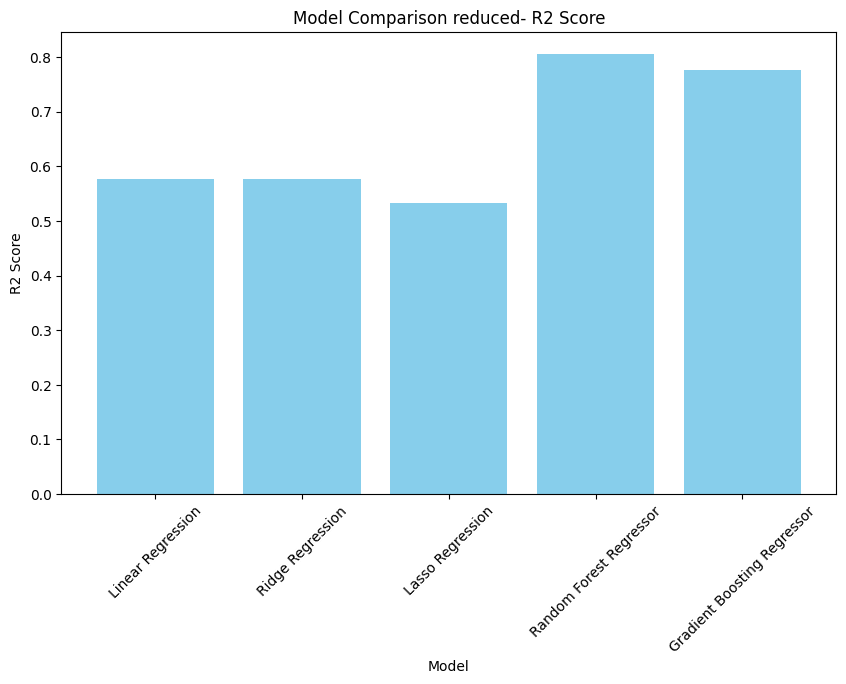

In [21]:
#on génère à nouveau les graphiques pour montrer les métriques calculées après avoir réduit notre matrice de données


print("Plotting performance metrics...")
metrics = ['MSE', 'MAE', 'R2 Score']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Model'], results_df[metric], color='skyblue')
    plt.title(f'Model Comparison reduced- {metric}')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()


Plotting Predicted vs Actual values for all models...


<ipython-input-34-10f6cb3ff832>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')


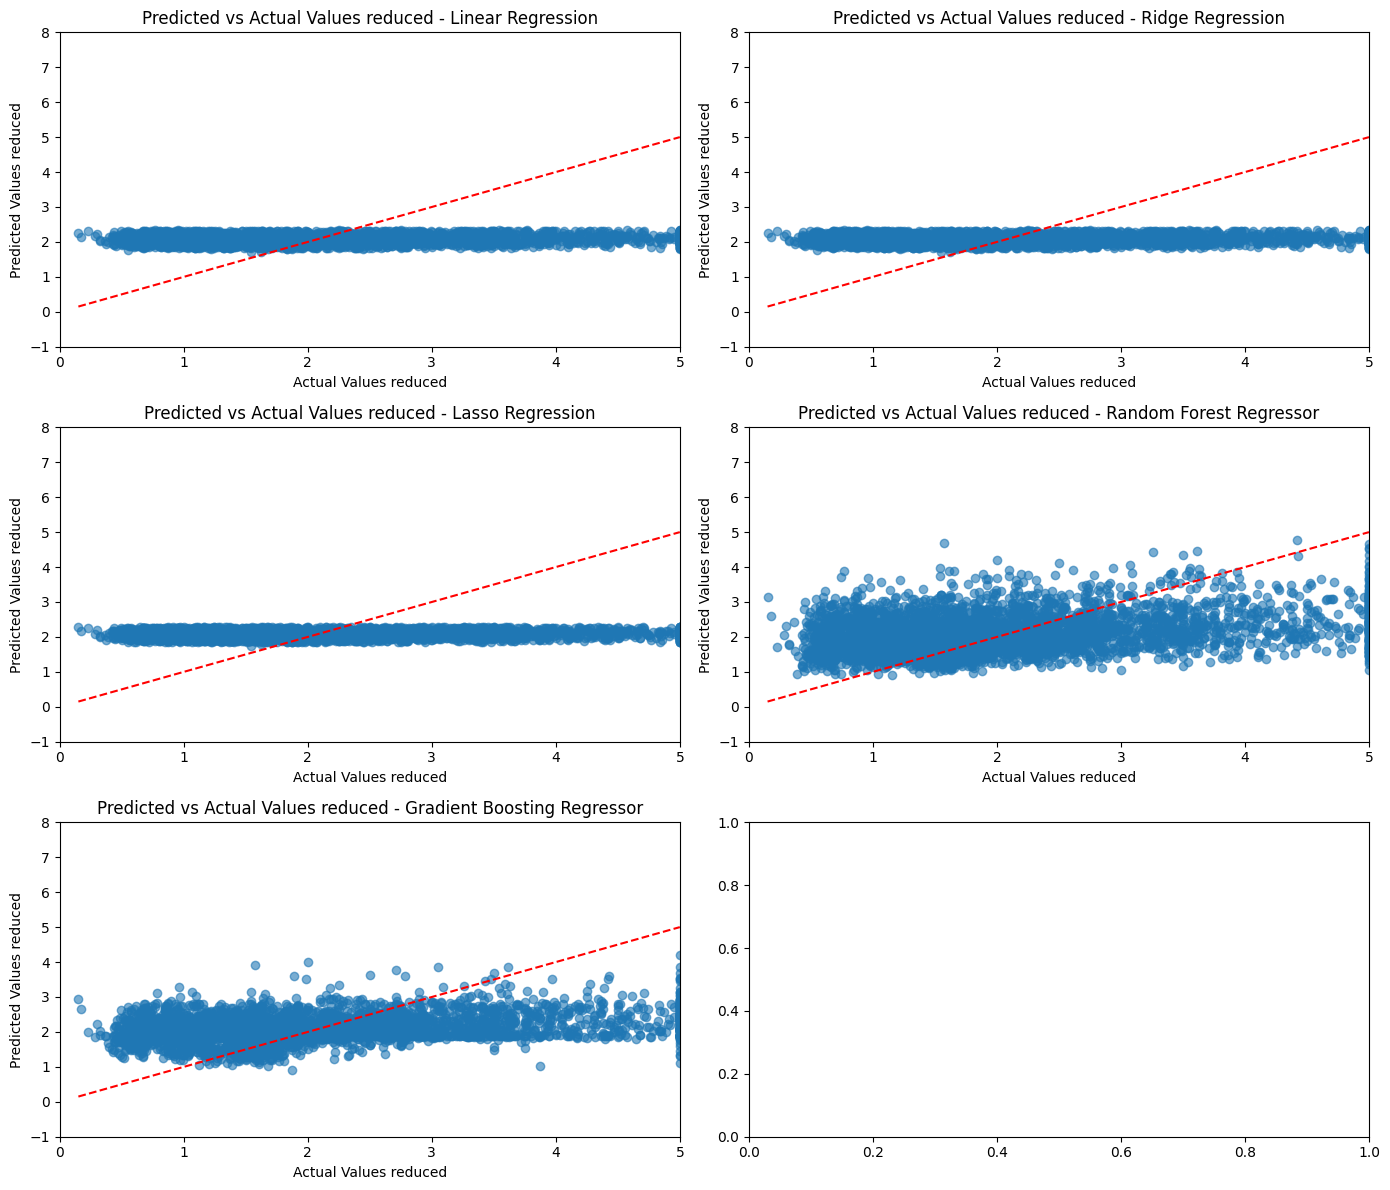

In [34]:
# nouveau graphiques après réduction
print("Plotting Predicted vs Actual values for all models...")
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()
for idx, (model_name, predictions) in enumerate(model_prediction_reduced.items()):
    axes[idx].scatter(y_test, predictions, alpha=0.6)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')
    axes[idx].set_xlim(0,5)
    axes[idx].set_ylim(-1,8)
    axes[idx].set_title(f'Predicted vs Actual Values reduced - {model_name}')
    axes[idx].set_xlabel('Actual Values reduced')
    axes[idx].set_ylabel('Predicted Values reduced')
plt.tight_layout()
plt.show()